In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [2]:
ogr = pd.read_csv('Ogrenci_Sayilari_2018_2019_.csv')

In [3]:
ogr.rename(columns = {'Unnamed: 1':'universite_adi','Unnamed: 2':'tur','Unnamed: 3':'il',
'Unnamed: 4':'ogrenim_turu','Unnamed: 5':'onlisans_erkek','Unnamed: 6':'onlisans_kadin',
'Unnamed: 7':'onlisans_toplam','Unnamed: 8':'lisans_erkek','Unnamed: 9':'lisans_kadin',
'Unnamed: 10':'lisans_toplam','Unnamed: 11':'ylisans_kadin','Unnamed: 12':'ylisans_erkek',
'Unnamed: 13':'ylisans_toplam','Unnamed: 14':'doktora_erkek','Unnamed: 15':'doktora_kadin',
'Unnamed: 16':'doktora_toplam','Unnamed: 17':'genel_erkek','Unnamed: 18':'genel_kadin',
'Unnamed: 19':'genel_toplam',} , inplace = True)

In [4]:
df_ogr = pd.DataFrame(ogr)
df_ogr.head()

,Unnamed: 0,universite_adi,tur,il,ogrenim_turu,onlisans_erkek,onlisans_kadin,onlisans_toplam,lisans_erkek,lisans_kadin,...,ylisans_kadin,ylisans_erkek,ylisans_toplam,doktora_erkek,doktora_kadin,doktora_toplam,genel_erkek,genel_kadin,genel_toplam,Unnamed: 20
0,NaN,ÖĞRENCİ SAYILARI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Üniversite Adı,Tür,İl,Öğrenim Türü,Okuyan Önlisans,NaN,NaN,Okuyan Lisans,NaN,...,Okuyan Yükseklisans,NaN,NaN,Okuyan Doktora,NaN,NaN,Genel Toplam,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,Erkek,Kadın,Toplam,Erkek,Kadın,...,Erkek,Kadın,Toplam,Erkek,Kadın,Toplam,Erkek,Kadın,Toplam,NaN
3,NaN,ABDULLAH GÜL ÜNİVERSİTESİ,DEVLET,KAYSERİ,BİRİNCİ Ö.,0,0,0,854,377,...,46,40,86,50,41,91,950,458,1408,NaN
4,NaN,ACIBADEM MEHMET ALİ AYDINLAR ÜNİVERSİTESİ,VAKIF,İSTANBUL,BİRİNCİ Ö.,343,706,1049,628,1741,...,67,266,333,18,88,106,1056,2801,3857,NaN


In [5]:
df_ogr.set_index("universite_adi" , inplace = True)

In [6]:
df_ogr.drop(['Unnamed: 0','Unnamed: 20'], axis=1 ,inplace = True)

In [7]:
df_ogr.drop(df_ogr.index[[0,1,2,26,27]] , inplace = True)

In [8]:
df_ogr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, ABDULLAH GÜL ÜNİVERSİTESİ to TOPLAM
Data columns (total 18 columns):
tur                437 non-null object
il                 437 non-null object
ogrenim_turu       437 non-null object
onlisans_erkek     438 non-null object
onlisans_kadin     438 non-null object
onlisans_toplam    438 non-null object
lisans_erkek       438 non-null object
lisans_kadin       438 non-null object
lisans_toplam      438 non-null object
ylisans_kadin      438 non-null object
ylisans_erkek      438 non-null object
ylisans_toplam     438 non-null object
doktora_erkek      438 non-null object
doktora_kadin      438 non-null object
doktora_toplam     438 non-null object
genel_erkek        438 non-null object
genel_kadin        438 non-null object
genel_toplam       438 non-null object
dtypes: object(18)
memory usage: 65.0+ KB


In [9]:
df_ogr.describe()

,tur,il,ogrenim_turu,onlisans_erkek,onlisans_kadin,onlisans_toplam,lisans_erkek,lisans_kadin,lisans_toplam,ylisans_kadin,ylisans_erkek,ylisans_toplam,doktora_erkek,doktora_kadin,doktora_toplam,genel_erkek,genel_kadin,genel_toplam
count,437,437,437,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438
unique,3,81,4,333,324,347,317,316,317,291,252,304,144,120,150,417,403,419
top,DEVLET,İSTANBUL,BİRİNCİ Ö.,0,0,0,0,0,0,0,0,0,0,0,0,78,2,21
freq,304,119,196,79,76,74,116,116,116,95,99,93,270,272,268,3,4,3


In [10]:
df_ogr['il'].value_counts().head(10)


İSTANBUL     119
ANKARA        34
İZMİR         18
ESKİŞEHİR     10
KONYA          9
ANTALYA        8
TRABZON        8
MERSİN         7
KAYSERİ        6
ISPARTA        6
Name: il, dtype: int64

In [11]:
df_ogr['ogrenim_turu'].value_counts()

BİRİNCİ Ö.    196
İKİNCİ Ö.     159
UZAKTAN Ö.     79
AÇIK Ö.         3
Name: ogrenim_turu, dtype: int64

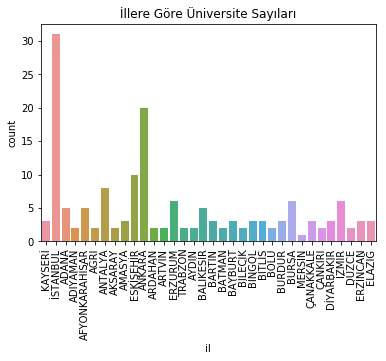

In [12]:
df_ogril = df_ogr['il'].head(160)
sns.countplot(x = df_ogril)
plt.title('İllere Göre Üniversite Sayıları')
plt.xticks(rotation = 90)
plt.show()

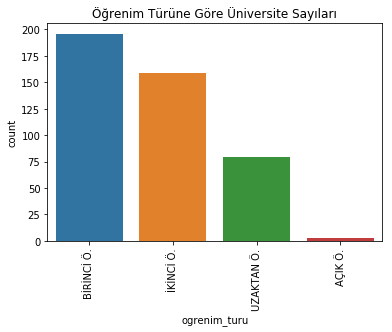

In [13]:
sns.countplot(x = df_ogr['ogrenim_turu'])
plt.title('Öğrenim Türüne Göre Üniversite Sayıları')
plt.xticks(rotation = 90)
plt.show()

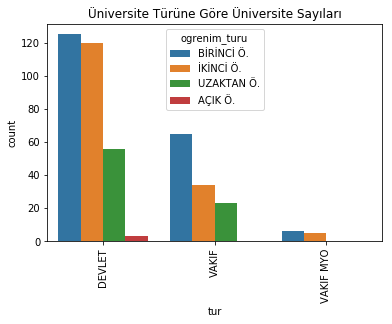

In [14]:
sns.countplot(x = 'tur', hue='ogrenim_turu' ,data = df_ogr)
plt.title('Üniversite Türüne Göre Üniversite Sayıları')
plt.xticks(rotation = 90)
plt.show()

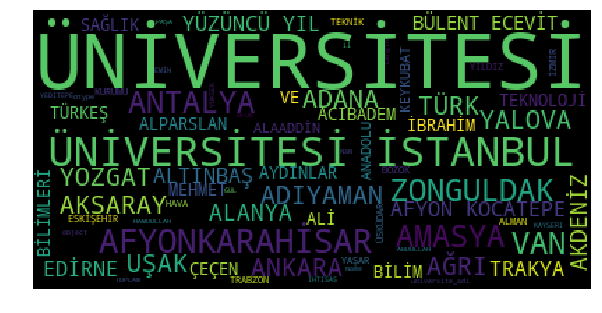

In [20]:
plt.figure(figsize = (10,10))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_ogr['il']))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()